In [1]:
%run 'vehicle_detection.py'

car_images = glob.glob('../data/vehicles/**/*.png')
notcar_images = glob.glob('../data/non-vehicles/**/*.png')
print(len(car_images))
print(len(notcar_images))

car_images = np.random.choice(car_images, 2000).tolist()
notcar_images = np.random.choice(notcar_images, 2000).tolist()
print(len(car_images))
print(len(notcar_images))

car_features = extract_features(car_images, cspace=Settings.color_space, \
                                spatial_size=Settings.spatial_size, hist_bins=Settings.hist_bin, \
                                hist_range=Settings.hist_range, orient=Settings.orient, \
                                pix_per_cell=Settings.pix_per_cell, cell_per_block=Settings.cell_per_block, \
                                hog_channel=Settings.hog_channel, hog_resize=Settings.hog_resize)
notcar_features = extract_features(notcar_images, cspace=Settings.color_space, \
                                spatial_size=Settings.spatial_size, hist_bins=Settings.hist_bin, \
                                hist_range=Settings.hist_range, orient=Settings.orient, \
                                pix_per_cell=Settings.pix_per_cell, cell_per_block=Settings.cell_per_block, \
                                hog_channel=Settings.hog_channel, hog_resize=Settings.hog_resize)
print('car_features.shape: ', np.asarray(car_features).shape, type(car_features))
print('notcar_features.shape: ', np.asarray(notcar_features).shape, type(notcar_features))
X = np.vstack((car_features, notcar_features))#.astype(np.float64)
print('X.shape: ', X.shape)
print('color_space: ', Settings.color_space)
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

'''
print('1 scaled_X.min: ', scaled_X.min())
scaled_X = scaled_X + abs(scaled_X.min())
asdf = scaled_X[scaled_X < 0]
print('asdf.shape: ', asdf.shape)
print('2 scaled_X.min: ', scaled_X.min())

# feature extraction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=800)
fit = test.fit(scaled_X, y)
transformed_X = fit.transform(scaled_X)
print('scaled_X.shape: ', scaled_X.shape)
print('transformed_X.shape: ', transformed_X.shape)
'''

rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using spatial binning of:', Settings.spatial_size,
    'and', Settings.hist_bin,'histogram bins')
print('Feature vector length:', len(X_train[0]))

svc = LinearSVC()
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()

print(round(t2-t, 2), 'Seconds to train SVC...')
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
t=time.time()
n_predict = 10

print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

svc_file = "./classifier.p"
pickle.dump(svc, open(svc_file, "wb"))

scaler_file = "./scaler.p"
pickle.dump(X_scaler, open(scaler_file, "wb"))

'''
tranformer_file = "./tranformer.p"
pickle.dump(fit, open(tranformer_file, "wb"))
'''



/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


8792
8968
2000
2000


/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


car_features.shape:  (2000, 5676) <class 'list'>
notcar_features.shape:  (2000, 5676) <class 'list'>
X.shape:  (4000, 5676)
color_space:  YUV
Using spatial binning of: (8, 8) and 64 histogram bins
Feature vector length: 5676
13.28 Seconds to train SVC...
Test Accuracy of SVC =  0.99
My SVC predicts:  [ 1.  0.  0.  1.  1.  0.  0.  1.  0.  1.]
For these 10 labels:  [ 1.  0.  0.  1.  1.  0.  0.  1.  0.  1.]
0.05463 Seconds to predict 10 labels with SVC


'\ntranformer_file = "./tranformer.p"\npickle.dump(fit, open(tranformer_file, "wb"))\n'

image.shape:  (720, 1280, 3)


/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


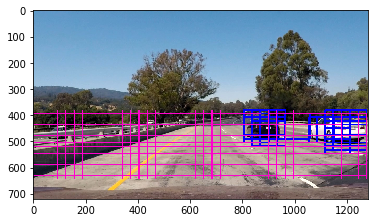

image.shape:  (720, 1280, 3)


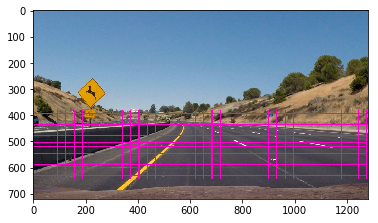

image.shape:  (720, 1280, 3)


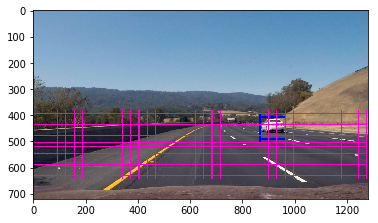

image.shape:  (720, 1280, 3)


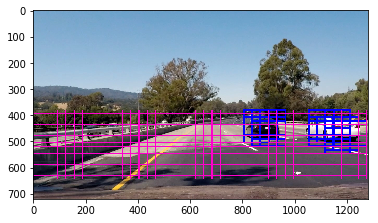

image.shape:  (720, 1280, 3)


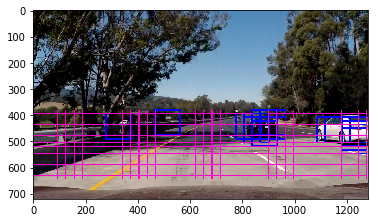

image.shape:  (720, 1280, 3)


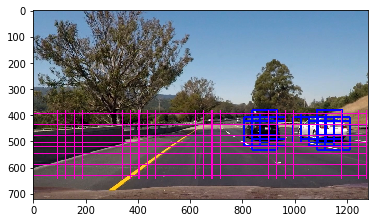

In [4]:
%run 'vehicle_detection.py'

svc_file = "./classifier.p"
svc = pickle.load(open(svc_file, "rb" ))

scaler_file = "./scaler.p"
X_scaler = pickle.load(open(scaler_file, "rb" ))

'''
tranformer_file = "./tranformer.p"
X_transformer = pickle.load(open(tranformer_file, "rb" ))
'''

'''
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
'''
y_start_stop = [402, None]

windows = slide_window((720, 1280), x_start_stop=Settings.x_start_stop, y_start_stop=Settings.y_start_stop,
                    xy_window=Settings.xy_window, xy_overlap=Settings.xy_overlap)

test_images = glob.glob('../test_images/*.jpg')
for image_file in test_images:
    image = mpimg.imread(image_file).astype(np.float32)
    print('image.shape: ', image.shape)
    draw_image = np.copy(image)

    hot_windows, _, cold_windows = search_windows(image, windows, svc, scaler=X_scaler, transformer=None, color_space=Settings.color_space, 
                            spatial_size=Settings.spatial_size, hist_bins=Settings.hist_bin, 
                            orient=Settings.orient, pix_per_cell=Settings.pix_per_cell, 
                            cell_per_block=Settings.cell_per_block, 
                            hog_channel=Settings.hog_channel, hog_resize=Settings.hog_resize)                       

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6) 
    window_img = draw_boxes(window_img, cold_windows, color=(255, 0, 205), thick=1)                    

    window_img = window_img.astype(np.uint8)
    plt.imshow(window_img)
    plt.show()



/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


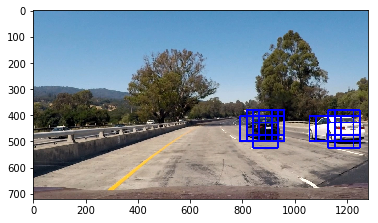

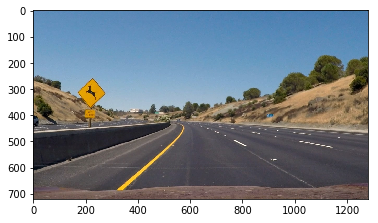

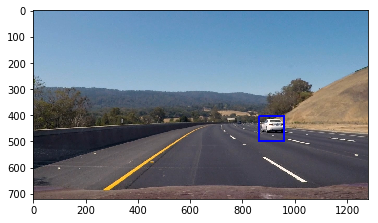

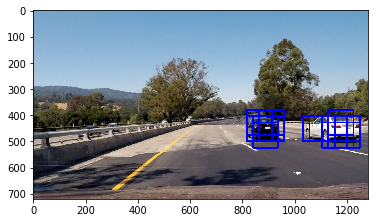

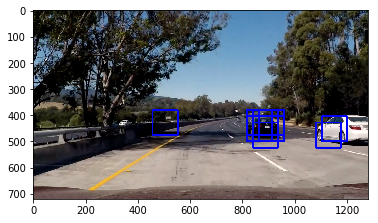

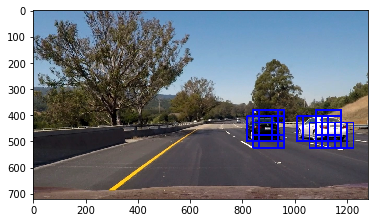

In [3]:
%run 'vehicle_detection.py'

svc_file = "./classifier.p"
svc = pickle.load(open(svc_file, "rb" ))

scaler_file = "./scaler.p"
X_scaler = pickle.load(open(scaler_file, "rb" ))

test_images = glob.glob('../test_images/*.jpg')
for image_file in test_images:
#for image_file in [test_images[0]]:
    img = mpimg.imread(image_file).astype(np.float32)

    y_start_stop = [390, 656]
    scale = 1.5

    out_img, _, _ = find_cars(img, ystart=Settings.y_start_stop[0], ystop=Settings.y_start_stop[1], scale=scale, svc=svc, \
                        X_scaler=X_scaler, orient=Settings.orient, pix_per_cell=Settings.pix_per_cell, \
                        cell_per_block=Settings.cell_per_block, spatial_size=Settings.spatial_size, hist_bins=Settings.hist_bin, \
                        color_space=Settings.color_space, hog_resize=Settings.hog_resize, cells_per_step=Settings.cells_per_step)

    out_img = out_img.astype(np.uint8)
    plt.imshow(out_img)
    plt.show()
